### Code

In [238]:
from PIL import Image
import glob

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [239]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # file Resize 28x28 and save
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# load image and resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("Scissor resize done")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("Rock resize done")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("Paper resize done")

100  images to be resized.
100  images resized.
Scissor resize done
42  images to be resized.
42  images resized.
Rock resize done
100  images to be resized.
100  images resized.
Paper resize done


In [240]:
import numpy as np

def load_data(img_path, number_of_data=300):
    # scissor : 0, rock : 1, paper : 2
    img_size=28
    color=3
    #create matrix image and label(scissor : 0, rock : 1, paper : 2)
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # copy image matrix into data area
        labels[idx]=0   # scissor : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   # rock : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   # paper : 2
        idx=idx+1
        
    print("x_train's image count", idx)
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # nomalization input value 0~1

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train's image count 242
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


label:  0


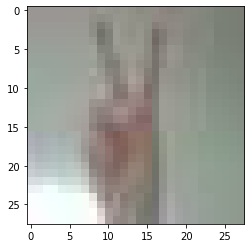

In [241]:
#hello
plt.imshow(x_train[0])
print('label: ', y_train[0])

In [242]:
#hyper parameter tunning
n_channel_1=100
n_channel_2=32
n_dense=32
n_train_epoch=100

#make model
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=n_train_epoch)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 26, 26, 100)       2800      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 11, 11, 32)        28832     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_73 (Dense)             (None, 3)               

In [244]:
#train

print("Before Reshape - x_train_norm shape: {}".format(x_train.shape))
print("Before Reshape - y_train_norm shape: {}".format(y_train.shape))

x_train_reshaped=x_train.reshape( -1, 28, 28, 3)  # -1 : auto-calculate data count
y_train_reshaped=y_train.reshape( -1,)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - y_train_reshaped shape: {}".format(y_train_reshaped.shape))

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
Before Reshape - y_train_norm shape: (300,)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)
After Reshape - y_train_reshaped shape: (300,)


In [245]:
#make x_test, y_test
#/test/

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("Scissor resize done")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("Paper resize done")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("Rock resize done")


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # nomalization input value 0~1

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
Scissor resize done
100  images to be resized.
100  images resized.
Paper resize done
100  images to be resized.
100  images resized.
Rock resize done
x_train's image count 300
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [246]:
#test accuracy

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.8878 - accuracy: 0.7367
test_loss: 0.8877754807472229 
test_accuracy: 0.7366666793823242


### Description

#### Conclusion 

1. The test accuacy does not rise by increasing the hyperparameters. 10,000 epochs were also tried, but there was no effect on accuracy.
2. It is necessary not only to design a model, but also to think about how to mathematically tune the model. Then, study of relu, softmax, and adam should be preceded first.
3. During the group discussion, we continued to search for hyperparameter tuning and kerastuner. When the test set was constructed with rock-paper-scissors photos taken by other people, the test acuity was up to 0.50 was shown.
In particular, 0.33 came out frequently at first, but the accuracy of 0.33 in rock-paper-scissors means that my model is not predicting at all.

This is my conclusion after much consideration.
I think it is difficult to accurately predict different backgrounds and other people's hands in a situation where the train set is only 100 for each case.
That is, I think tuning was difficult due to a lack of absolute train data numbers, not a problem of model tuning.

Even though I made new test data set with the same hand in the same background, the accuracy was around 0.73.
So when someone else makes test data against a different background, it seems difficult to exceed the accuracy of 0.60.
In the first place, it is difficult to learn high-performance because there are only 100 pictures of each rock-scissor-paper case.